In [1]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
# OPTIONAL: Download images for colab
import requests

def download(url, fn):
    r = requests.get(url)
    if r.status_code == 200:
        open(fn, 'wb').write(r.content)
        print("{} downloaded: {:.2f} KB".format(fn, len(r.content)/1024.))
    else:
        print("url not found:", url)

# download the matlab matrices
download('http://6.869.csail.mit.edu/fa19/psets19/pset5/flower.mat', 'flower.mat')
download('http://6.869.csail.mit.edu/fa19/psets19/pset5/dog.mat', 'dog.mat')
download('http://6.869.csail.mit.edu/fa19/psets19/pset5/pedestrian.mat', 'pedestrian.mat')


# download corresponding jpeg images
download('http://6.869.csail.mit.edu/fa19/psets19/pset5/flower.jpg', 'flower.jpg')
download('http://6.869.csail.mit.edu/fa19/psets19/pset5/dog.jpg', 'dog.jpg')
download('http://6.869.csail.mit.edu/fa19/psets19/pset5/pedestrian.png', 'pedestrian.png')

flower.mat downloaded: 1.24 KB
dog.mat downloaded: 1.09 KB
pedestrian.mat downloaded: 0.88 KB
flower.jpg downloaded: 4.87 KB
dog.jpg downloaded: 40.90 KB
pedestrian.png downloaded: 16.03 KB


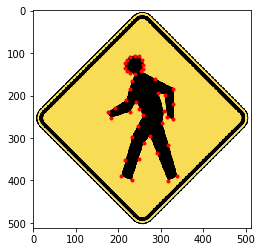

In [3]:
# PART A
flower = scipy.io.loadmat('./flower.mat')
dog = scipy.io.loadmat('./dog.mat')
pedestrian = scipy.io.loadmat('./pedestrian.mat')

def load_data(fn):
    if fn == 'flower':
        x = flower['x']
        y = flower['y']
        im = plt.imread('./flower.jpg')

    elif fn == 'dog':
        x = dog['x']
        y = dog['y']
        im = plt.imread('./dog.jpg')

    elif fn == 'pedestrian':
        x = pedestrian['x']
        y = pedestrian['y']
        im = plt.imread('./pedestrian.png')
    return x-1, y-1, im


filename = "pedestrian"
x, y, im = load_data(filename)

plt.imshow(im)
plt.savefig(filename + "a.png")
plt.plot(x, y, 'r.')

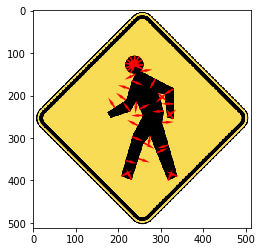

In [4]:
# PART B
bisector_x = []
bisector_y = []
for i in range(1, len(x)-1):
    u = [x[i+1] - x[i], y[i+1] - y[i]]
    v = [x[i-1] - x[i], y[i-1] - y[i]]

    # normalize vectors to be unit vectors
    u /= np.linalg.norm(u)
    v /= np.linalg.norm(v)

    # compute the normal direction to plot
    b = u + v# TODO
    b /= np.linalg.norm(b)
    
    bisector_x.append(b[0])
    bisector_y.append(-b[1]) # *-1 for display alignment


plt.figure()
plt.imshow(im)
plt.quiver(x[1:-1], y[1:-1], bisector_x, bisector_y, headwidth=2, color='r')
plt.savefig(filename + "b.png")
plt.show()

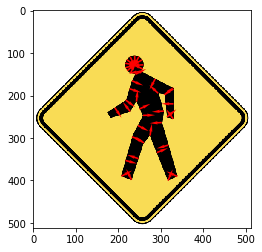

In [5]:
# PART C

# calculate marginal probabilities
p = [0.5, 0.5]

direction = np.zeros((len(x)))

for i in range(1, len(x) - 1):
    u = [x[i+1] - x[i], y[i+1] - y[i]]
    v = [x[i-1] - x[i], y[i-1] - y[i]]

    v /= np.linalg.norm(v)
    u /= np.linalg.norm(u)
    
    v = np.ravel(v)
    u = np.ravel(u)
    # compute the theta, might need to do +/- 2*pi accordingly
    # TODO
    norm = np.cross(u,v)
    theta = np.arcsin(norm)
    direction[i] = theta
    
    # update marginal probabilities with local evidence;
    p[0] *= (np.pi + theta) / (2*np.pi)
    p[1] *= (np.pi - theta) / (2*np.pi)

# go through and based on the marginals, plot correct arrow direction
bisector_x = []
bisector_y = []

for i in range(1, len(x) - 1):
    u = [x[i+1] - x[i], y[i+1] - y[i]]
    v = [x[i-1] - x[i], y[i-1] - y[i]]
    #d = direction([x[i-1], y[i-1]], [x[i], y[i]], [x[i+1], y[i+1]])
    d = direction[i]

    # normalize vectors to be unit vectors
    u /= np.linalg.norm(u)
    v /= np.linalg.norm(v)

    
    # compute the normal direction to plot
    b = u + v
    b /= np.linalg.norm(b)
    
    # decide whether flip the normal direction based on local evidence and marginal probability p
    if p[0] > p[1]:
        if direction[i] < 0:
            b = -b
    else:
        if direction[i] > 0:
            b = -b
        


    bisector_x.append(b[0])
    bisector_y.append(-b[1]) # *-1 for display alignment

plt.figure()
plt.imshow(im)
plt.quiver(x[1:-1], y[1:-1], bisector_x, bisector_y, headwidth=2, color='r')
plt.savefig(filename + "c.png")
plt.show()
